# Logistic regression

Let $\mathcal D = \{\boldsymbol x_i, y_i\}$, $y_i \in \{0, 1\}$.  **Logistic regression** model predicts the probability of the positive class:

$$
    \widehat y = \sigma(\boldsymbol x^\top \boldsymbol w) = \mathbb P(\boldsymbol x \in \text{class }1),
$$

where $\sigma(t) = \frac 1{1 + e^{-t}}$ — **sigmoid function**.


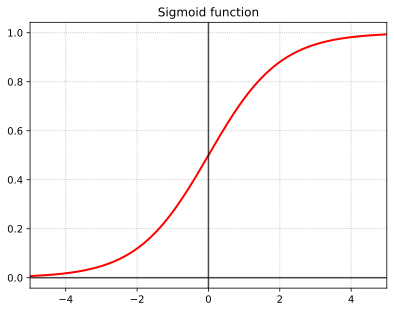

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

%config InlineBackend.figure_formats = ['svg']

xs = np.linspace(-5, 5, num=401)
plt.plot(xs, expit(xs), c='r', lw=2)
plt.title("Sigmoid function")
plt.xlim(-5, 5)
plt.axhline(c="k", alpha=0.7)
plt.axvline(c="k", alpha=0.7)
plt.grid(ls=":");

**Q**. What is $\sigma'(t)$?

```{admonition} Answer
:class: tip, dropdown
$$
\sigma'(t) = \frac{e^{-t}}{(1+e^{-t})^2} = \sigma(t) (1-\sigma(t))
$$
```

The linear output $\boldsymbol x^\top \boldsymbol w$ is also called **logit**.

The loss function is binary cross-entropy

```{math}
:label: bin-log-reg-loss
    \begin{multline*}
    \mathcal L(\boldsymbol w) = -\frac 1n\sum\limits_{i=1}^n \big(y_i \log \widehat y_i + (1-y_i)\log(1-\widehat y_i)\big) = \\
    =-\frac 1n\sum\limits_{i=1}^n \big(y_i \log(\sigma(\boldsymbol x_i^\top \boldsymbol w)) + (1- y_i)\log(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w))\big).
    \end{multline*}
```



````{admonition} Question
:class: important
How will the cross entropy loss change if $\mathcal Y = \{-1, 1\}$?

```{admonition} Answer
:class: tip, dropdown
In this case

$$
    \mathbb P(\boldsymbol x \in \text{class }1) = \sigma(\boldsymbol x^\top \boldsymbol w), \quad \mathbb P(\boldsymbol x \in \text{class }-1) = \sigma(-\boldsymbol x^\top \boldsymbol w).
$$

Hence,

$$
\begin{multline*}
\mathcal L(\boldsymbol w) = -\frac 1n\sum\limits_{i=1}^n [y_i = 1] \log\sigma(\boldsymbol x_i^\top \boldsymbol w) + [y_i = -1] \log\sigma(-\boldsymbol x_i^\top \boldsymbol w)
= \\
= -\frac 1n\sum\limits_{i=1}^n \log \sigma(y_i \boldsymbol x_i^\top \boldsymbol w) =
\frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{y_i \boldsymbol x_i^\top \boldsymbol w}\big).
\end{multline*}
$$
```
````

## Regularization

The loss function for $L_2$-regularized logistic regression with is $\mathcal Y = \{-1, 1\}$

$$
\mathcal L(\boldsymbol w) = \frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{y_i \boldsymbol x_i^\top \boldsymbol w}\big) + C \boldsymbol w^\top \boldsymbol w.
$$

There are also versions of $L_1$ penalizer or elastic net.

## Example: breast cancer dataset

This is a dataset with $30$ features and binary target.

In [32]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data['data'].shape, data['target'].shape

((569, 30), (569,))

Malignant or benign?

In [33]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [34]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Divide the dataset into train and test:

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

Now take the logistic regression from `sklearn`:

In [51]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The default value of `max_iter` is $100$, and here it is not enough for convergence. However, accuracy is not bad:

In [52]:
print("Train accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy:", log_reg.score(X_test, y_test))

Train accuracy: 0.9560439560439561
Test accuracy: 0.9035087719298246


Now increase `max_iter` argument:

In [53]:
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

The improvement of accuracy seems not to be significant:

In [54]:
print("Train accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy:", log_reg.score(X_test, y_test))

Train accuracy: 0.967032967032967
Test accuracy: 0.9122807017543859
